<a href="https://colab.research.google.com/github/yamil-abraham/titanic-ML-from-disaster/blob/main/Titanic_Machine_Learning_2_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv("train.csv")

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

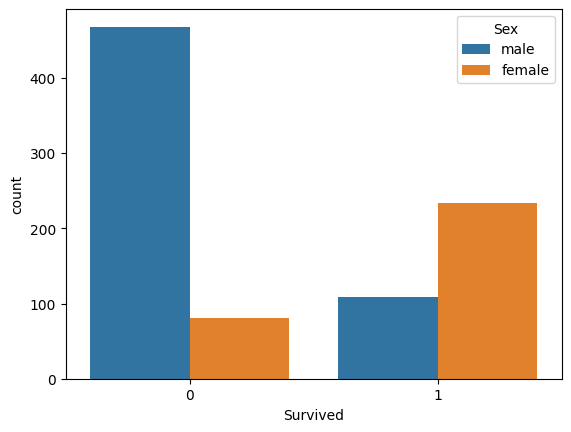

In [4]:
import seaborn as sb
sb.countplot(x="Survived", data=data, hue="Sex")

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

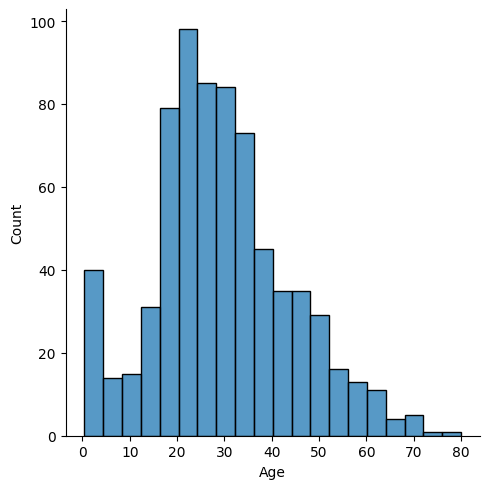

In [6]:
sb.displot(x="Age", data=data)

In [7]:
data["Age"].mean()

29.69911764705882

In [8]:
data["Age"].fillna(data["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [9]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [10]:
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data = data.drop(["Cabin"], axis=1)

In [13]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
data = data.dropna()

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
data = data.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [17]:
dummies_sex = pd.get_dummies(data["Sex"],drop_first=True)
#multilinearity

In [18]:
data = data.join(dummies_sex)
data = data.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

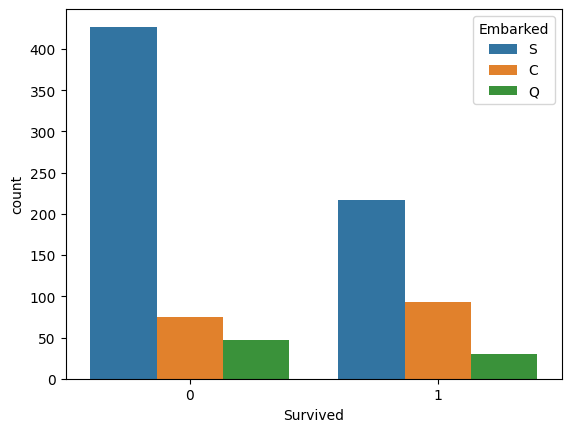

In [19]:
sb.countplot(x="Survived", data=data, hue="Embarked")

In [20]:
dummies_embarked = pd.get_dummies(data["Embarked"],drop_first=True)

In [21]:
data = data.join(dummies_embarked)
data = data.drop(["Embarked"], axis=1)

<Axes: >

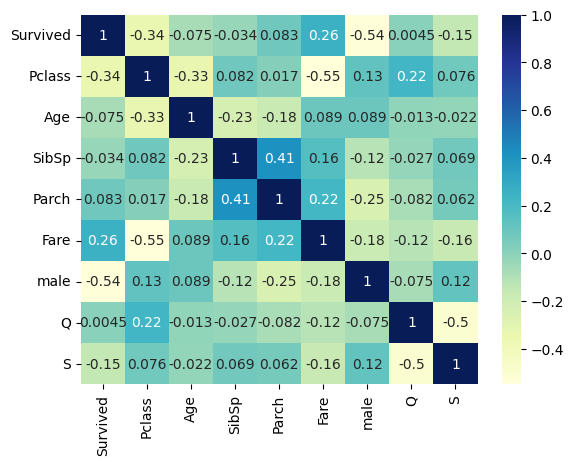

In [22]:
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

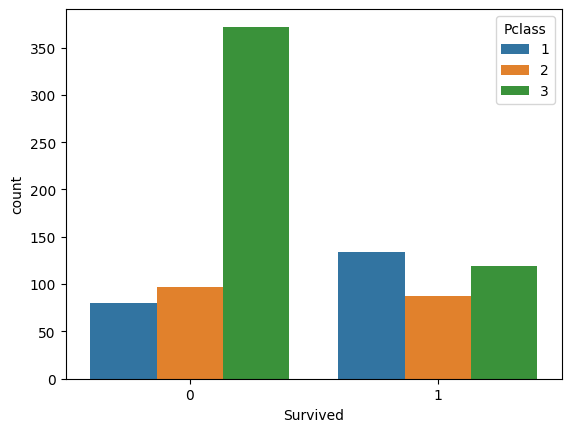

In [23]:
sb.countplot(x="Survived", data=data, hue="Pclass")

In [24]:
X = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=50)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7584269662921348

In [29]:
from sklearn.tree import DecisionTreeClassifier

results = []
for i in range(1,15):
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  acc = accuracy_score(y_test, predictions)
  print(f"Result for {i}: {acc}")
  results.append(acc)

Result for 1: 0.7921348314606742
Result for 2: 0.7584269662921348
Result for 3: 0.8202247191011236
Result for 4: 0.7808988764044944
Result for 5: 0.797752808988764
Result for 6: 0.8146067415730337
Result for 7: 0.8146067415730337
Result for 8: 0.8033707865168539
Result for 9: 0.8146067415730337
Result for 10: 0.7865168539325843
Result for 11: 0.797752808988764
Result for 12: 0.7696629213483146
Result for 13: 0.7696629213483146
Result for 14: 0.7640449438202247


<Axes: >

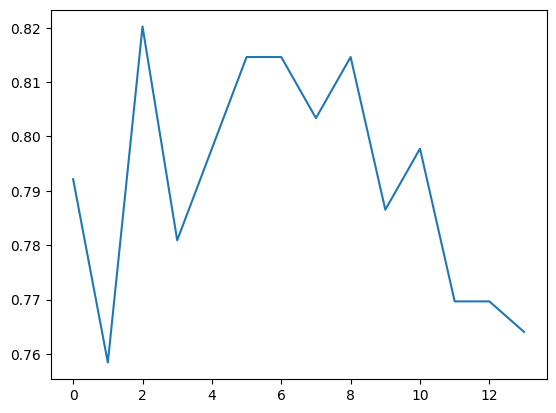

In [30]:
sb.lineplot(data=results)

In [32]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       104
           1       0.84      0.70      0.76        74

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178



In [34]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions), columns=["Pred: N", "Pred: Y"], index=["Real: N", "Real: Y"])

,Pred: N,Pred: Y
Real: N,94,10
Real: Y,22,52


[Text(0.5, 0.875, 'male <= 0.5\n0.468\n711\n[445, 266]\nSurvived'),
 Text(0.25, 0.625, 'Pclass <= 2.5\n0.397\n249\n[68, 181]\nNo Survived'),
 Text(0.125, 0.375, 'Age <= 2.5\n0.11\n137\n[8, 129]\nNo Survived'),
 Text(0.0625, 0.125, '0.5\n2\n[1, 1]\nSurvived'),
 Text(0.1875, 0.125, '0.098\n135\n[7, 128]\nNo Survived'),
 Text(0.375, 0.375, 'Fare <= 23.35\n0.497\n112\n[60, 52]\nSurvived'),
 Text(0.3125, 0.125, '0.491\n90\n[39, 51]\nNo Survived'),
 Text(0.4375, 0.125, '0.087\n22\n[21, 1]\nSurvived'),
 Text(0.75, 0.625, 'Age <= 13.0\n0.3\n462\n[377, 85]\nSurvived'),
 Text(0.625, 0.375, 'SibSp <= 2.5\n0.495\n31\n[14, 17]\nNo Survived'),
 Text(0.5625, 0.125, '0.111\n17\n[1, 16]\nNo Survived'),
 Text(0.6875, 0.125, '0.133\n14\n[13, 1]\nSurvived'),
 Text(0.875, 0.375, 'Pclass <= 1.5\n0.266\n431\n[363, 68]\nSurvived'),
 Text(0.8125, 0.125, '0.461\n100\n[64, 36]\nSurvived'),
 Text(0.9375, 0.125, '0.175\n331\n[299, 32]\nSurvived')]

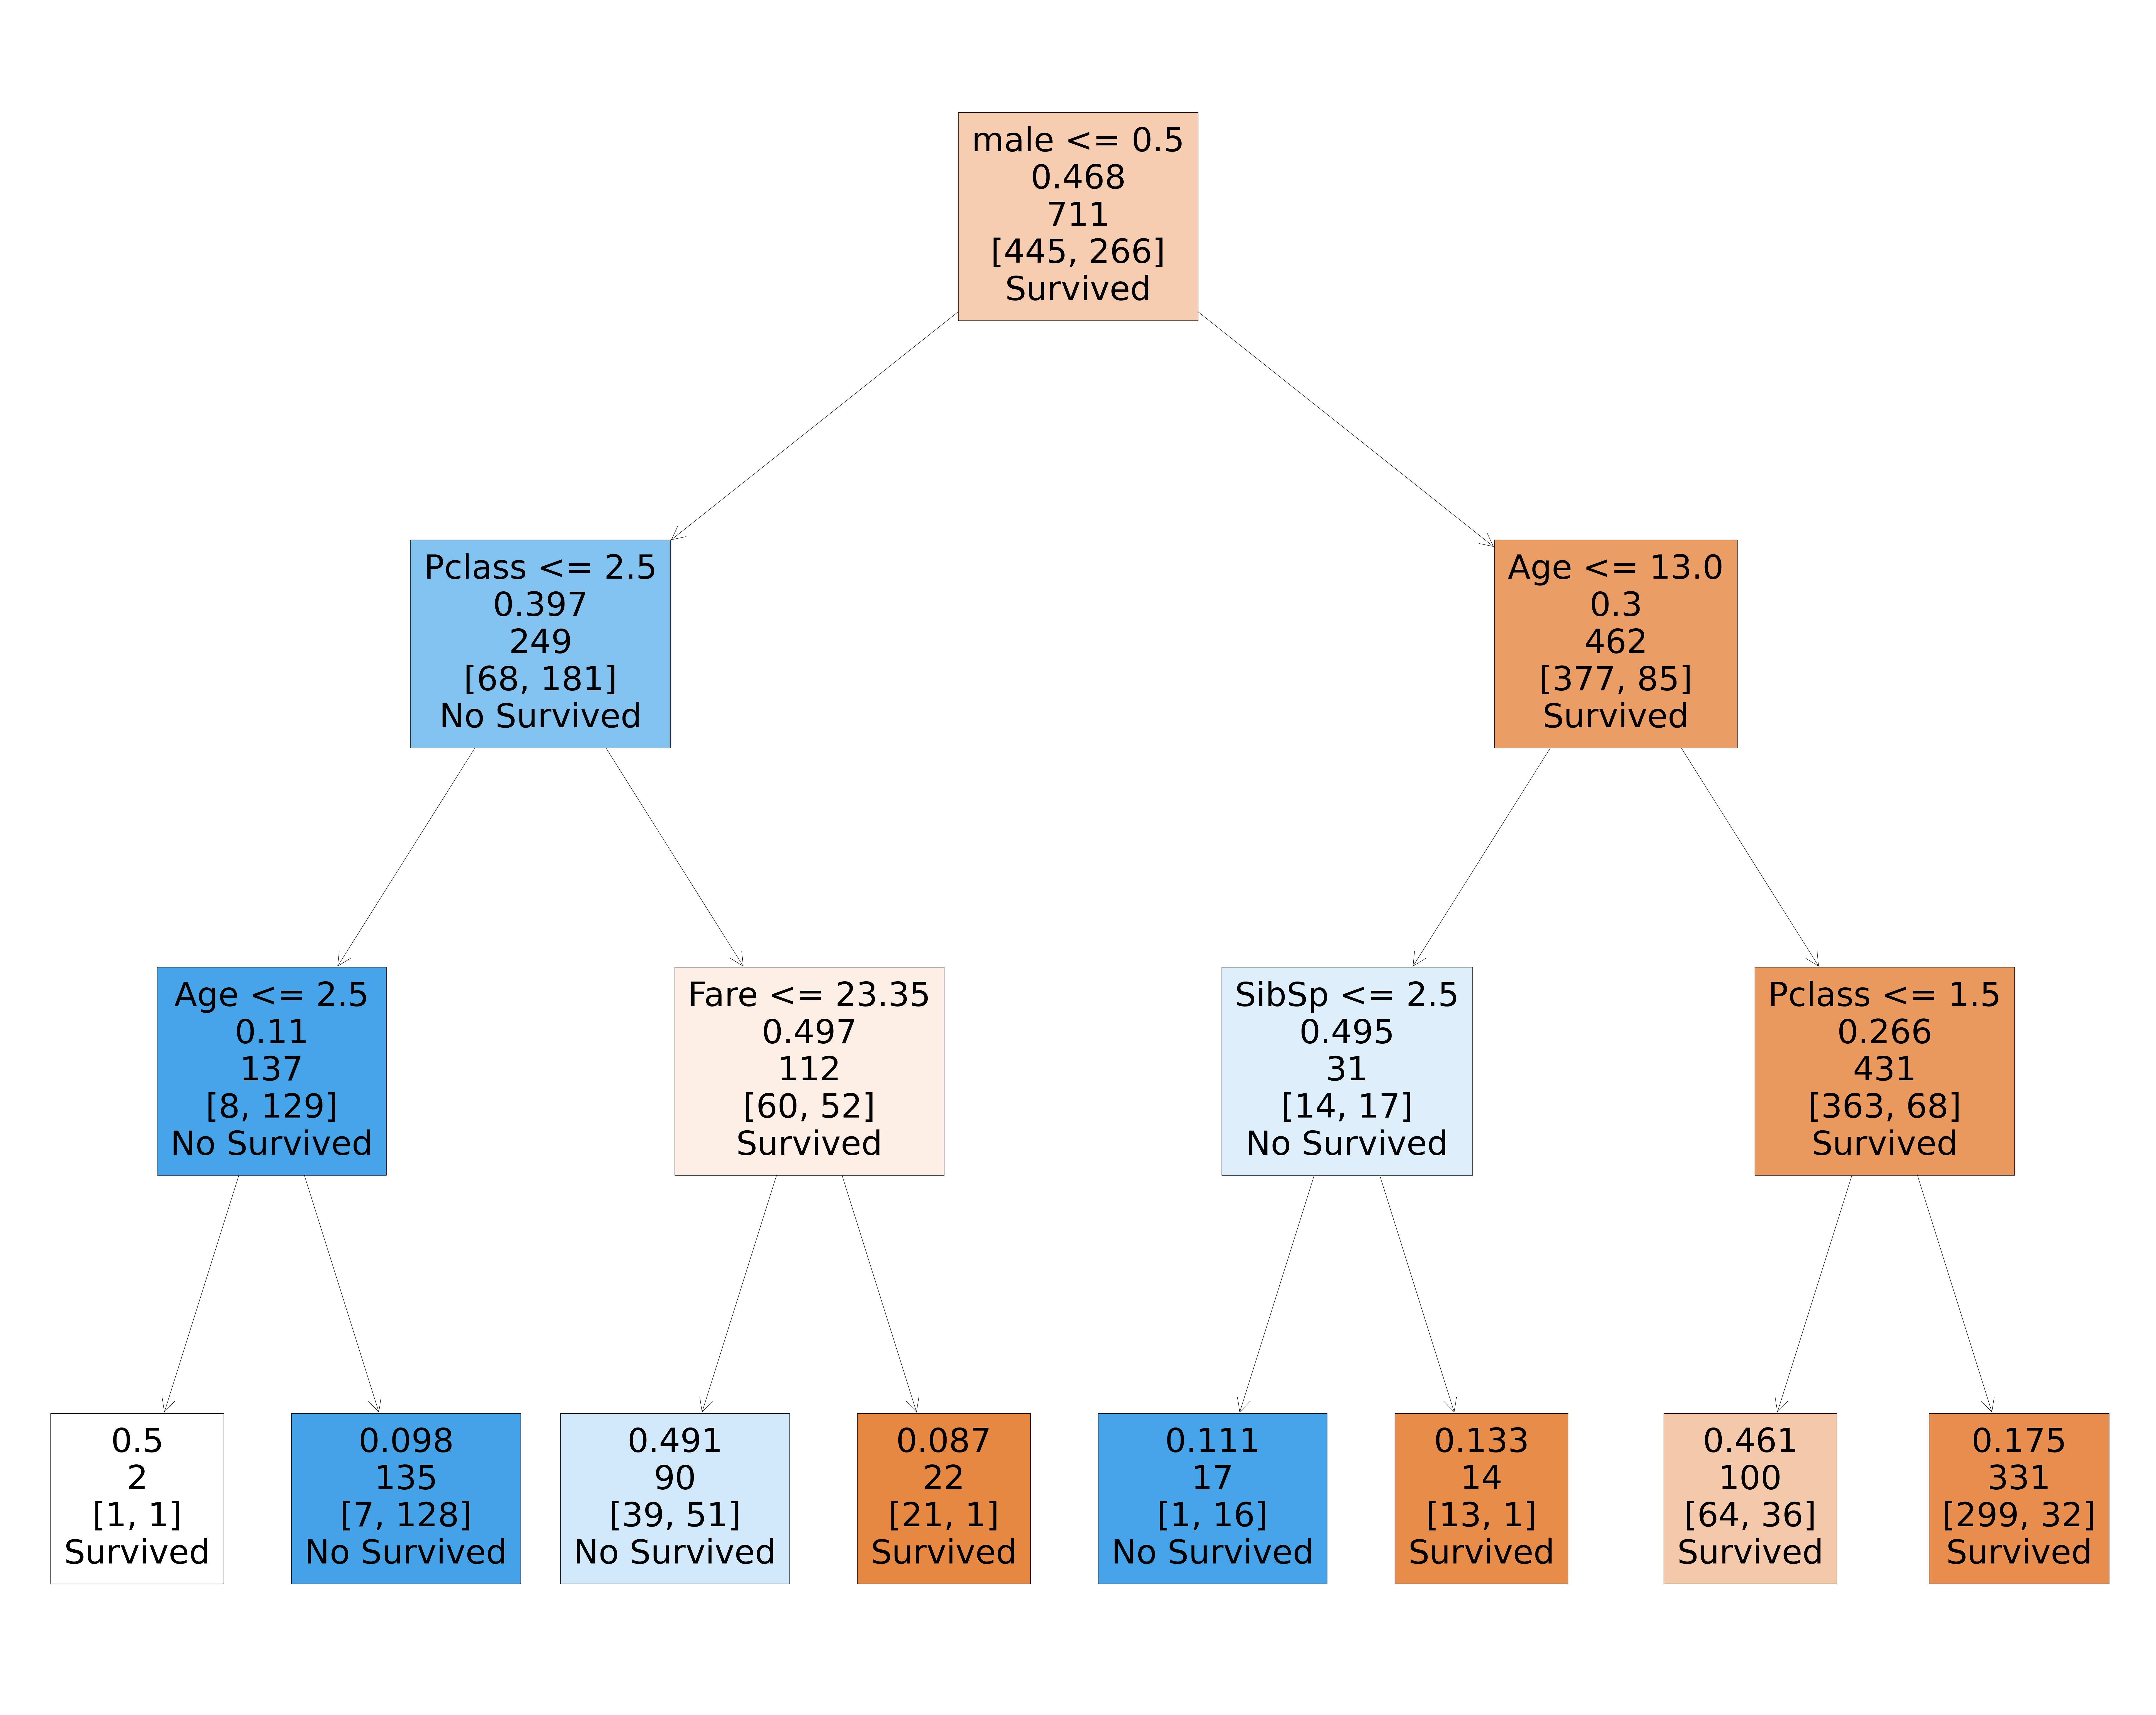

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
      model,
      feature_names=X_train.columns,
      class_names=["Survived","No Survived"],
      filled=True, label="none"
)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8089887640449438

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       114
           1       0.74      0.72      0.73        64

    accuracy                           0.81       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[98, 16],
       [18, 46]])

In [ ]:
pd.DataFrame(confusion_matrix(y_test, predictions), columns=["Pred: N", "Pred: Y"], index=["Real: N", "Real: Y"])

,Pred: N,Pred: Y
Real: N,98,16
Real: Y,18,46


In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [ ]:
add_me = [1, 28, 0, 0, 80, 1, 0, 0]

prediction_me = model.predict([add_me])
if prediction_me[0] == 1:
  print("Survived")
else:
  print("No survived")

Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
